In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

In [2]:
data_dir = 'datasets/'

In [3]:
train_dir = os.path.join(data_dir, 'Training')
test_dir = os.path.join(data_dir, 'Testing')

In [4]:
train_gli = os.path.join(train_dir, 'glioma_tumor')
train_meni = os.path.join(train_dir, 'meningioma_tumor')
train_no = os.path.join(train_dir, 'no_tumor')
train_pit = os.path.join(train_dir, 'pituitary_tumor')

In [5]:
test_gli = os.path.join(test_dir, 'glioma_tumor')
test_meni = os.path.join(test_dir, 'meningioma_tumor')
test_no = os.path.join(test_dir, 'no_tumor')
test_pit = os.path.join(test_dir, 'pituitary_tumor')

In [6]:
train_gli_fnames = os.listdir( train_gli )
train_no_fnames = os.listdir( train_no )

In [7]:
print(train_gli_fnames[:10])
print(train_no_fnames[:10])

['gg (1).jpg', 'gg (10).jpg', 'gg (100).jpg', 'gg (101).jpg', 'gg (102).jpg', 'gg (103).jpg', 'gg (104).jpg', 'gg (105).jpg', 'gg (106).jpg', 'gg (107).jpg']
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', 'image (10).jpg', 'image (11).jpg']


In [8]:
print('total training glioma images     :', len(os.listdir(train_gli)))
print('total training meningioma images :', len(os.listdir(train_meni)))
print('total training clean images      :', len(os.listdir(train_no)))
print('total training pituitary images  :', len(os.listdir(train_pit)))

print('\ntotal test glioma images     :', len(os.listdir(test_gli)))
print('total test meningioma images :', len(os.listdir(test_meni)))
print('total test clean images      :', len(os.listdir(test_no)))
print('total test pituitary images  :', len(os.listdir(test_pit)))

print('\ntotal training images    :', len(os.listdir(train_gli))+len(os.listdir(train_meni))+len(os.listdir(train_no))+len(os.listdir(train_pit)))
print('total test images        :', len(os.listdir(test_gli))+len(os.listdir(test_meni))+len(os.listdir(test_no))+len(os.listdir(test_pit)))

total training glioma images     : 826
total training meningioma images : 822
total training clean images      : 395
total training pituitary images  : 827

total test glioma images     : 100
total test meningioma images : 115
total test clean images      : 105
total test pituitary images  : 74

total training images    : 2870
total test images        : 394


In [9]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

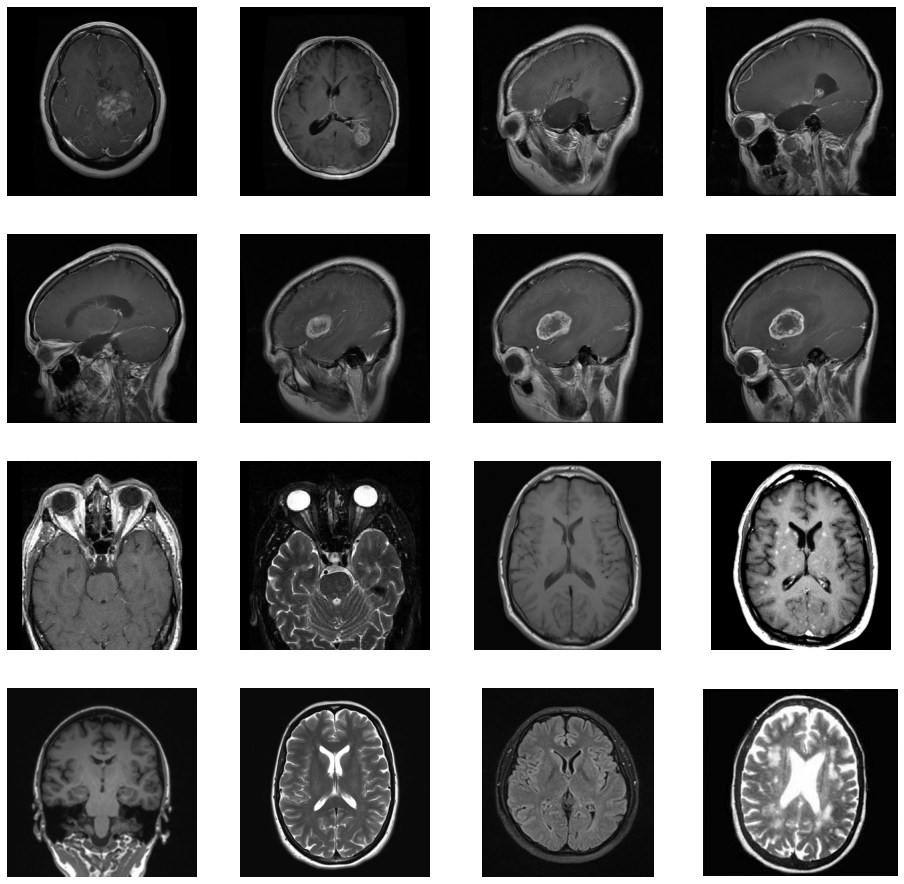

In [10]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_glitumor_pix = [os.path.join(train_gli, fname) 
                for fname in train_gli_fnames[ pic_index-8:pic_index] 
               ]

next_notumor_pix = [os.path.join(train_no, fname) 
                for fname in train_no_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_glitumor_pix+next_notumor_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        color_mode="rgb",
        class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        color_mode="rgb",
        class_mode='categorical')

Found 394 images belonging to 4 classes.


In [13]:
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = tf.keras.models.Sequential()
#model.add(pretrained_model)

model.add(tf.keras.layers.Conv2D(64, (5, 5), activation = 'relu', input_shape = (150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.0001),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 128)       65664     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       1

In [16]:
history = model.fit(
            train_generator,
            validation_data = test_generator,
            epochs = 30,
            validation_steps = len(test_generator)//20,
            verbose = 1)

Epoch 1/30
144/144 [==============================] - 86s 589ms/step - loss: 1.3103 - accuracy: 0.3652 - val_loss: 1.7141 - val_accuracy: 0.2000
Epoch 2/30
144/144 [==============================] - 87s 603ms/step - loss: 1.1966 - accuracy: 0.4554 - val_loss: 2.1671 - val_accuracy: 0.1000
Epoch 3/30
144/144 [==============================] - 87s 601ms/step - loss: 1.1183 - accuracy: 0.5087 - val_loss: 1.4161 - val_accuracy: 0.2500
Epoch 4/30
144/144 [==============================] - 86s 594ms/step - loss: 1.0691 - accuracy: 0.5380 - val_loss: 2.6017 - val_accuracy: 0.1500
Epoch 5/30
144/144 [==============================] - 94s 651ms/step - loss: 1.0316 - accuracy: 0.5537 - val_loss: 1.8543 - val_accuracy: 0.1000
Epoch 6/30
144/144 [==============================] - 88s 613ms/step - loss: 1.0128 - accuracy: 0.5537 - val_loss: 1.9573 - val_accuracy: 0.1000
Epoch 7/30
144/144 [==============================] - 89s 616ms/step - loss: 0.9792 - accuracy: 0.5686 - val_loss: 2.4707 - val_ac

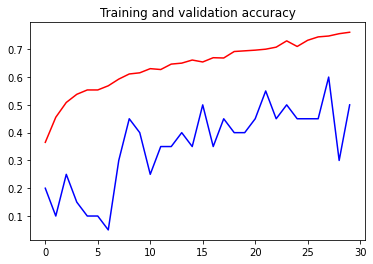

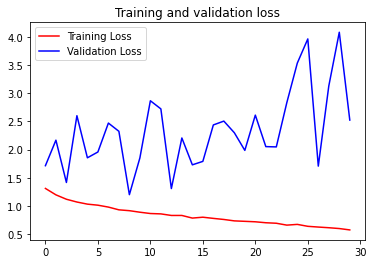

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [18]:
print(history)

In [19]:
from keras.preprocessing import image

try_predict = "datasets\Testing\\no_tumor\image(10).jpg"

img = image.load_img(try_predict, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=20)
print(try_predict)
print(classes)

datasets\Testing\no_tumor\image(10).jpg
[[0. 0. 1. 0.]]


In [20]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('datasets\Testing\\no_tumor\image(11).jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices


print(result)
print()

[[0.000000e+00 1.000000e+00 8.598923e-17 0.000000e+00]]



In [21]:
new_res = result[0]
print(new_res)
print(new_res[0])
print(new_res[1])
print(new_res[2])
print(new_res[3])

[0.000000e+00 1.000000e+00 8.598923e-17 0.000000e+00]
0.0
1.0
8.598923e-17
0.0


In [22]:
lists = []
for i in range(4):
    lists.append(new_res[i])

print(lists)

[0.0, 1.0, 8.598923e-17, 0.0]


In [23]:
type(result)

numpy.ndarray

In [24]:
print(result[0][0],result[0][1],result[0][2],result[0][3])

0.0 1.0 8.598923e-17 0.0


In [25]:
print(classes)

[[0. 0. 1. 0.]]


In [26]:
train_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [27]:
classes.sum()

1.0

In [28]:
TFLITE_SAVED_MODEL = "tflite_saved_model"

In [30]:
tf.saved_model.save(model, TFLITE_SAVED_MODEL)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: tflite_saved_model\assets


In [32]:
loaded = tf.saved_model.load(TFLITE_SAVED_MODEL)

In [33]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'conv2d_input': TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='conv2d_input')})
{'dense_1': TensorSpec(shape=(None, 4), dtype=tf.float32, name='dense_1')}


In [34]:
converter = tf.lite.TFLiteConverter.from_saved_model(TFLITE_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [35]:
tflite_model_file = 'converttflite_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [36]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])